In this notebook, existing TED talks' attributes from the downloaded data will be used to derive new features of interest through the process of feature engineering. Following which, exploratory data analysis will be conducted to uncover insights from the dataset.

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# pd.options.display.max_columns = 999
# pd.options.display.max_rows = 999
# pd.options.display.max_colwidth = 100
pd.options.display.float_format = "{:.3f}".format

%config InlineBackend.figure_format = "retina"
%matplotlib inline

## Load TED talks data (cleaned)

In [3]:
ted_talks = pd.read_csv("../data/ted_talks_clean.csv", 
            parse_dates=["published_time", "recorded_date"])

In [4]:
# observe top 5 rows of df
display(ted_talks.head())

# view shape of df
ted_talks.shape

,id,title,description,url,num_views,num_comments,is_featured,video_type,event,institute_name,...,main_speaker,num_speakers,speaker_id_1,speaker_name_1,speaker_description_1,speaker_is_published_1,speaker_what_others_say_1,speaker_who_they_are_1,speaker_why_listen_1,transcript
0,65059,How do our brains process speech?,"The average 20-year-old knows between 27,000 a...",https://www.ted.com/talks/gareth_gaskell_how_d...,242823,0,0,TED-Ed Original,TED-Ed,None,...,Gareth Gaskell,1,6049,"Gareth, Gaskell",None,0,None,None,None,"The average 20 year old knows between 27,000 a..."
1,65073,Give yourself permission to be creative,"Reflecting on moments that shaped his life, ac...",https://www.ted.com/talks/ethan_hawke_give_you...,685370,34,1,TED Stage Talk,TED2020,None,...,Ethan Hawke,1,5979,"Ethan, Hawke","Actor, writer, director",1,None,"""Ethan Hawke has quietly emerged as perhaps ou...",Ethan Hawke is a four-time Academy Award-nomin...,I was hoping today to talk a little bit about ...
2,65061,How caffeine and alcohol affect your sleep,"Caffeine wakes you up, and alcohol makes you n...",https://www.ted.com/talks/matt_walker_how_caff...,90336,5,1,Original Content,Sleeping with Science,None,...,Matt Walker,1,5226,"Matt, Walker","Sleep scientist, professor, author",1,None,Matt Walker is a brain scientist trying to und...,Matt Walker's research examines the impact of ...,Many of us like to start the day with a cup of...
3,65280,"The myth of Jason, Medea, and the Golden Fleece","In Colchis, the hide of a mystical flying ram ...",https://www.ted.com/talks/iseult_gillespie_the...,221929,0,0,TED-Ed Original,TED-Ed,None,...,Iseult Gillespie,1,4095,"Iseult, Gillespie",None,0,None,None,None,In the center of Colchis in an enchanted garde...
4,65074,"A comprehensive, neighborhood-based response t...",Crisis interventions often focus on a single a...,https://www.ted.com/talks/kwame_owusu_kesse_a_...,579269,8,1,TED Stage Talk,TED2020,None,...,Kwame Owusu-Kesse,1,6023,"Kwame, Owusu-Kesse",Community leader,1,None,"Kwame Owusu-Kesse ensures the programming, fin...",Kwame Owusu-Kesse is chief executive officer o...,Good evening. It is such a blessing to work at...


(3996, 41)

## 4.1 Feature Engineering

In [5]:
# get number of related talks

related_talks_list = [c for c in ted_talks.columns if "related_talk" in c]

# function to get no. of related talks
def get_num_related(row):
    count = 0
    for i in related_talks_list:
        if row[i] != 0:
            count += 1
    return count

# no. of related talks
ted_talks["num_related"] = ted_talks[related_talks_list].apply(get_num_related, axis=1)

# display df to view additions
display(ted_talks[related_talks_list + ["num_related"]].head())

,related_talk_1,related_talk_2,related_talk_3,related_talk_4,related_talk_5,related_talk_6,num_related
0,63654,23933,6857,2709,2495,2158,6
1,64173,60752,24504,453,2513,2438,6
2,65060,61900,41105,1810,1044,3686,6
3,46592,21650,27674,50986,49279,64730,6
4,63813,65045,63655,63812,2789,2364,6


In [6]:
# get length of title
ted_talks["title_len"] = ted_talks["title"].str.split().map(len)

# get length of talk description
ted_talks["description_len"] = ted_talks["description"].str.split().map(len)

# display df to view additions
display(ted_talks[["title", "description", 
                   "title_len", "description_len"]].head())

,title,description,title_len,description_len
0,How do our brains process speech?,"The average 20-year-old knows between 27,000 a...",6,79
1,Give yourself permission to be creative,"Reflecting on moments that shaped his life, ac...",6,41
2,How caffeine and alcohol affect your sleep,"Caffeine wakes you up, and alcohol makes you n...",7,36
3,"The myth of Jason, Medea, and the Golden Fleece","In Colchis, the hide of a mystical flying ram ...",9,81
4,"A comprehensive, neighborhood-based response t...",Crisis interventions often focus on a single a...,6,96


In [7]:
# get length of transcript
ted_talks["transcript_len"] = ted_talks["transcript"].str.split().map(len)

# display df to view additions
display(ted_talks[["transcript", "transcript_len"]].head())

,transcript,transcript_len
0,"The average 20 year old knows between 27,000 a...",616
1,I was hoping today to talk a little bit about ...,1489
2,Many of us like to start the day with a cup of...,745
3,In the center of Colchis in an enchanted garde...,636
4,Good evening. It is such a blessing to work at...,957


In [8]:
# get published_day/month/year from published time

# published_day
ted_talks["published_day"] = ted_talks["published_time"].dt.weekday.map(lambda x: x+1)

# published_month
ted_talks["published_month"] = ted_talks["published_time"].dt.month

# published_year
ted_talks["published_year"] = ted_talks["published_time"].dt.year

# display df to view additions
display(ted_talks[["published_time", "published_day", 
                   "published_month", "published_year"]].head())

,published_time,published_day,published_month,published_year
0,2020-07-23 18:37:33,4,7,2020
1,2020-07-23 14:50:06,4,7,2020
2,2020-07-22 14:12:49,3,7,2020
3,2020-07-21 15:17:29,2,7,2020
4,2020-07-21 14:54:56,2,7,2020


In [9]:
# get no. of days between data extraction date: 01/08/2020 and published_time
ted_talks["num_months"] = (pd.to_datetime('08/01/2020') - 
                           ted_talks["published_time"]) / np.timedelta64(1, "M")

# get average monthly views since published_time
ted_talks["avg_m_views"] = ted_talks["num_views"] / ted_talks["num_months"]

# display df to view additions
display(ted_talks[["num_views", "published_time", "num_months", "avg_m_views"]].head())

,num_views,published_time,num_months,avg_m_views
0,242823,2020-07-23 18:37:33,0.270,898691.871
1,685370,2020-07-23 14:50:06,0.275,2488765.463
2,90336,2020-07-22 14:12:49,0.309,292263.379
3,221929,2020-07-21 15:17:29,0.340,651830.288
4,579269,2020-07-21 14:54:56,0.341,1698810.684


In [10]:
# tags getdummies
tags_df = ted_talks["tags"].str.get_dummies(",").add_prefix("tag_")

# take_action getdummies
actions_df = ted_talks["take_action"].str.get_dummies(",").add_prefix("action_")

In [11]:
# concatenate ted_talks, tags_df, actions_df
ted_talks = pd.concat([ted_talks, tags_df, actions_df], axis=1)

# drop original tags and take_action columns
ted_talks.drop(["tags", "take_action"], axis=1, inplace=True)

## 4.2 Remove outliers

In [12]:
# for a "true" analysis of average monthly viewership
# remove talks published in July 2020
# as these talks have been published for <1month from the date of analysis

# get index of talks published in July 2020
jul20_ind = ted_talks.loc[(ted_talks["published_month"] == 7) & 
                          (ted_talks["published_year"] == 2020)].index

print("No. of talks published in July 2020: ", len(jul20_ind))

# drop talks published in July 2020
ted_talks.drop(jul20_ind, axis=0, inplace=True)

No. of talks published in July 2020:  30


In [13]:
# the distribution plot of average monthly views revealed outliers
# of talks with >1.5M in average monthly viewership
# while it reflects the no. of views garnered by the individual talk
# may not be reflective of the typical no. of views that a talk will garner

# get index of talks with >1.5M average monthly views
views_outliers = ted_talks.loc[ted_talks["avg_m_views"] >= 1_500_000].index

print("No. of talks with >1.5M average monthly views: ", len(views_outliers))

# drop outliers
ted_talks.drop(views_outliers, axis=0, inplace=True)

No. of talks with >1.5M average monthly views:  2


In [14]:
# reset index
ted_talks.reset_index(drop=True, inplace=True)

## Export data with new features as csv

In [15]:
ted_talks.to_csv("../data/ted_talks_new_features.csv", index=False)

## 4.3 Exploratory Data Analysis

In [16]:
# get columns for easy filtering

# column names that are not talk/speaker ids
avg_m_views_ind = ted_talks.columns.tolist().index("avg_m_views")

cols_not_id = [c for c in ted_talks.columns[:avg_m_views_ind+1] 
               if "id" not in c and "related_talk" not in c]

# columns arising from tags getdummies
tags_cols = [c for c in ted_talks.columns if "tag_" in c]

# columns arising from actions getdummies
actions_cols = [c for c in ted_talks.columns if "action_" in c]

### Summary Statistics

In [17]:
# view summary statistics of numerical columns that are not:
# talk/speaker ids, tags/actions getdummies
ted_talks[cols_not_id].describe().T

,count,mean,std,min,25%,50%,75%,max
num_views,3964.000,2195407.527,3436708.964,0.000,912218.000,1414556.500,2188714.750,60899749.000
num_comments,3964.000,132.925,243.050,0.000,16.000,66.000,160.000,6529.000
is_featured,3964.000,0.831,0.375,0.000,1.000,1.000,1.000,1.000
num_tags,3964.000,7.903,3.882,1.000,5.000,7.000,10.000,33.000
num_resources,3964.000,0.448,0.803,0.000,0.000,0.000,1.000,7.000
num_actions,3964.000,0.307,0.673,0.000,0.000,0.000,0.000,4.000
num_recommend,3964.000,1.268,2.660,0.000,0.000,0.000,0.000,29.000
has_citations,3964.000,0.193,0.394,0.000,0.000,0.000,0.000,1.000
num_languages,3964.000,25.668,8.730,1.000,20.000,25.000,31.000,74.000
duration_min,3964.000,12.005,6.204,1.000,6.380,12.170,16.100,66.520


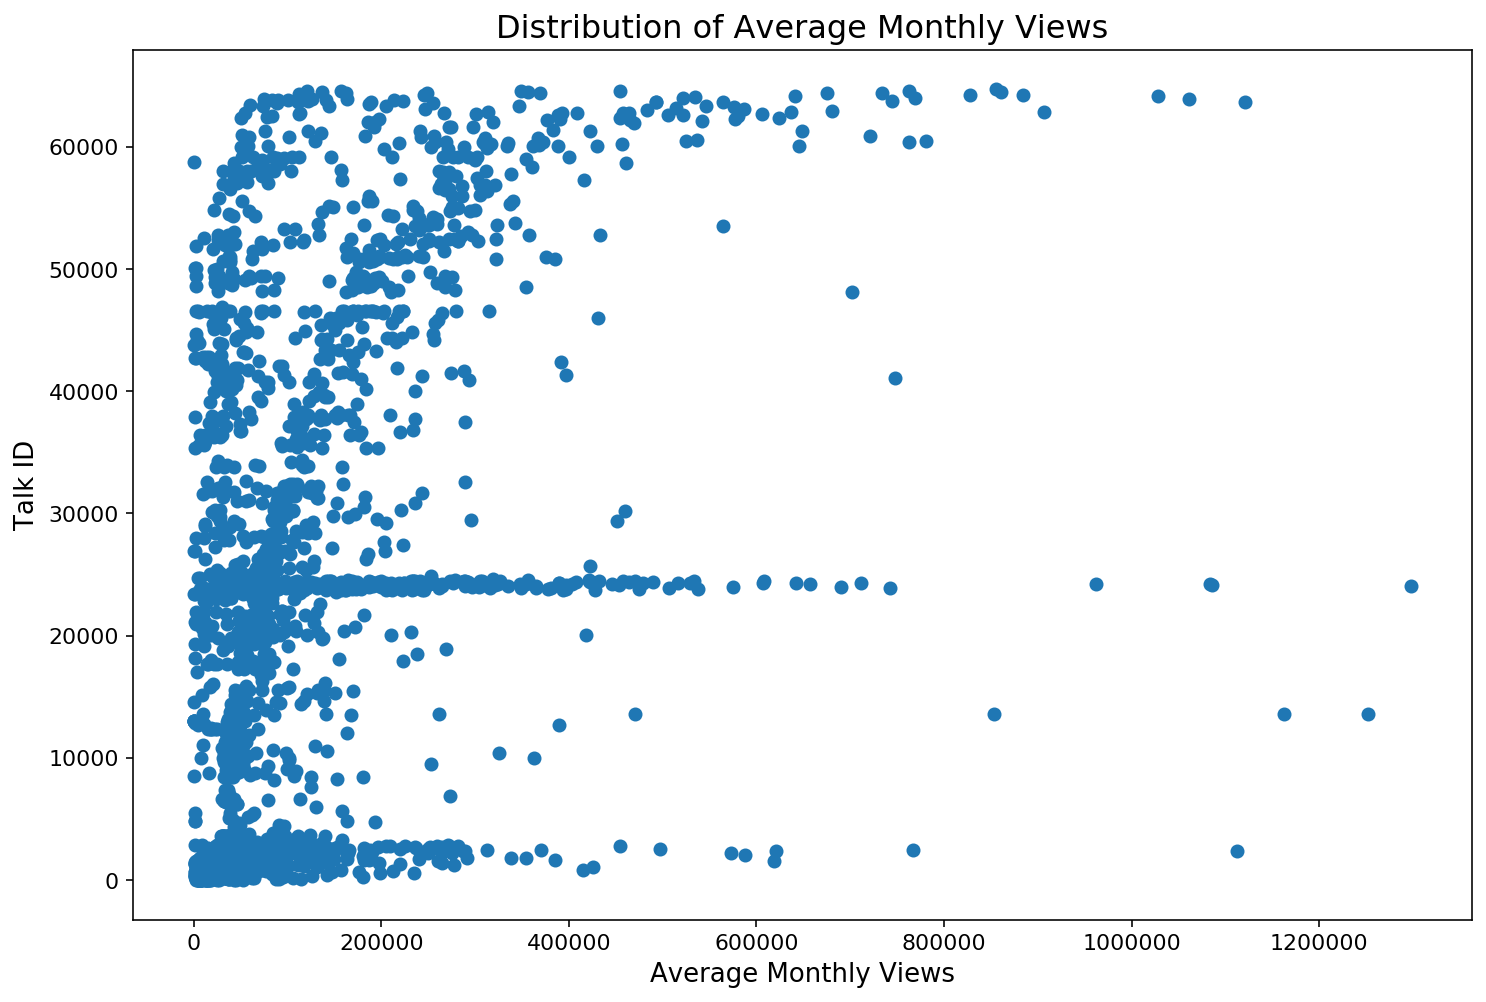

In [22]:
# distribution of average monthly views
plt.figure(figsize=(12,8))
plt.scatter(x="avg_m_views", y="id", data=ted_talks)
plt.title("Distribution of Average Monthly Views", fontsize=16)
plt.xlabel("Average Monthly Views", fontsize=13)
plt.ylabel("Talk ID", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

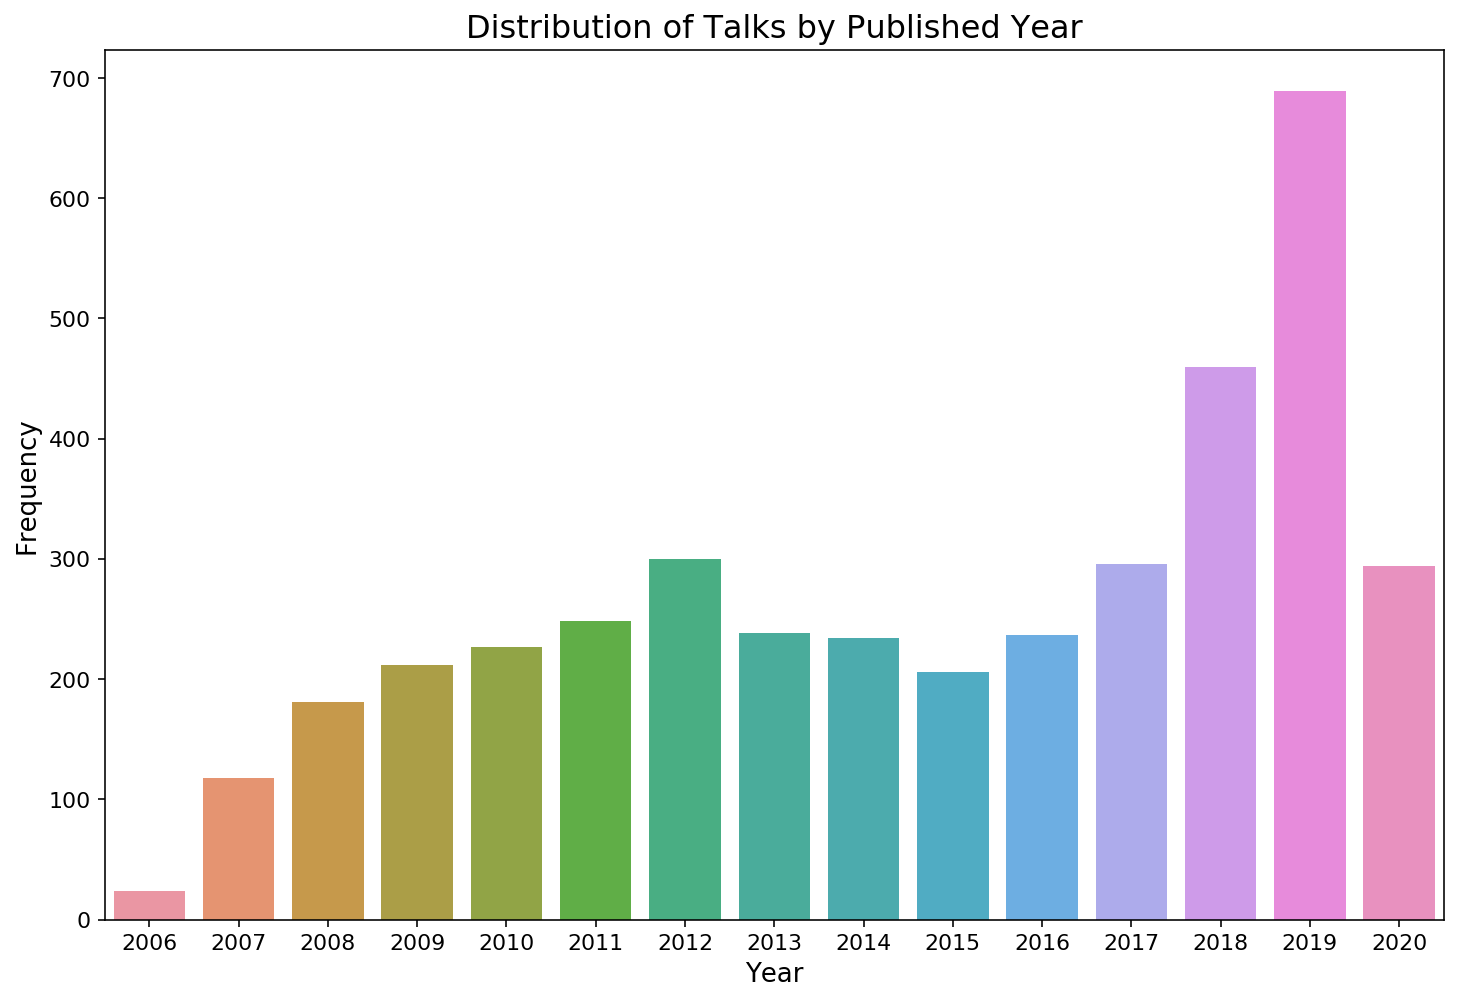

In [38]:
# distribution of talks by published year
plt.figure(figsize=(12,8))
sns.countplot("published_year", data=ted_talks)
plt.title("Distribution of Talks by Published Year", fontsize=16)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

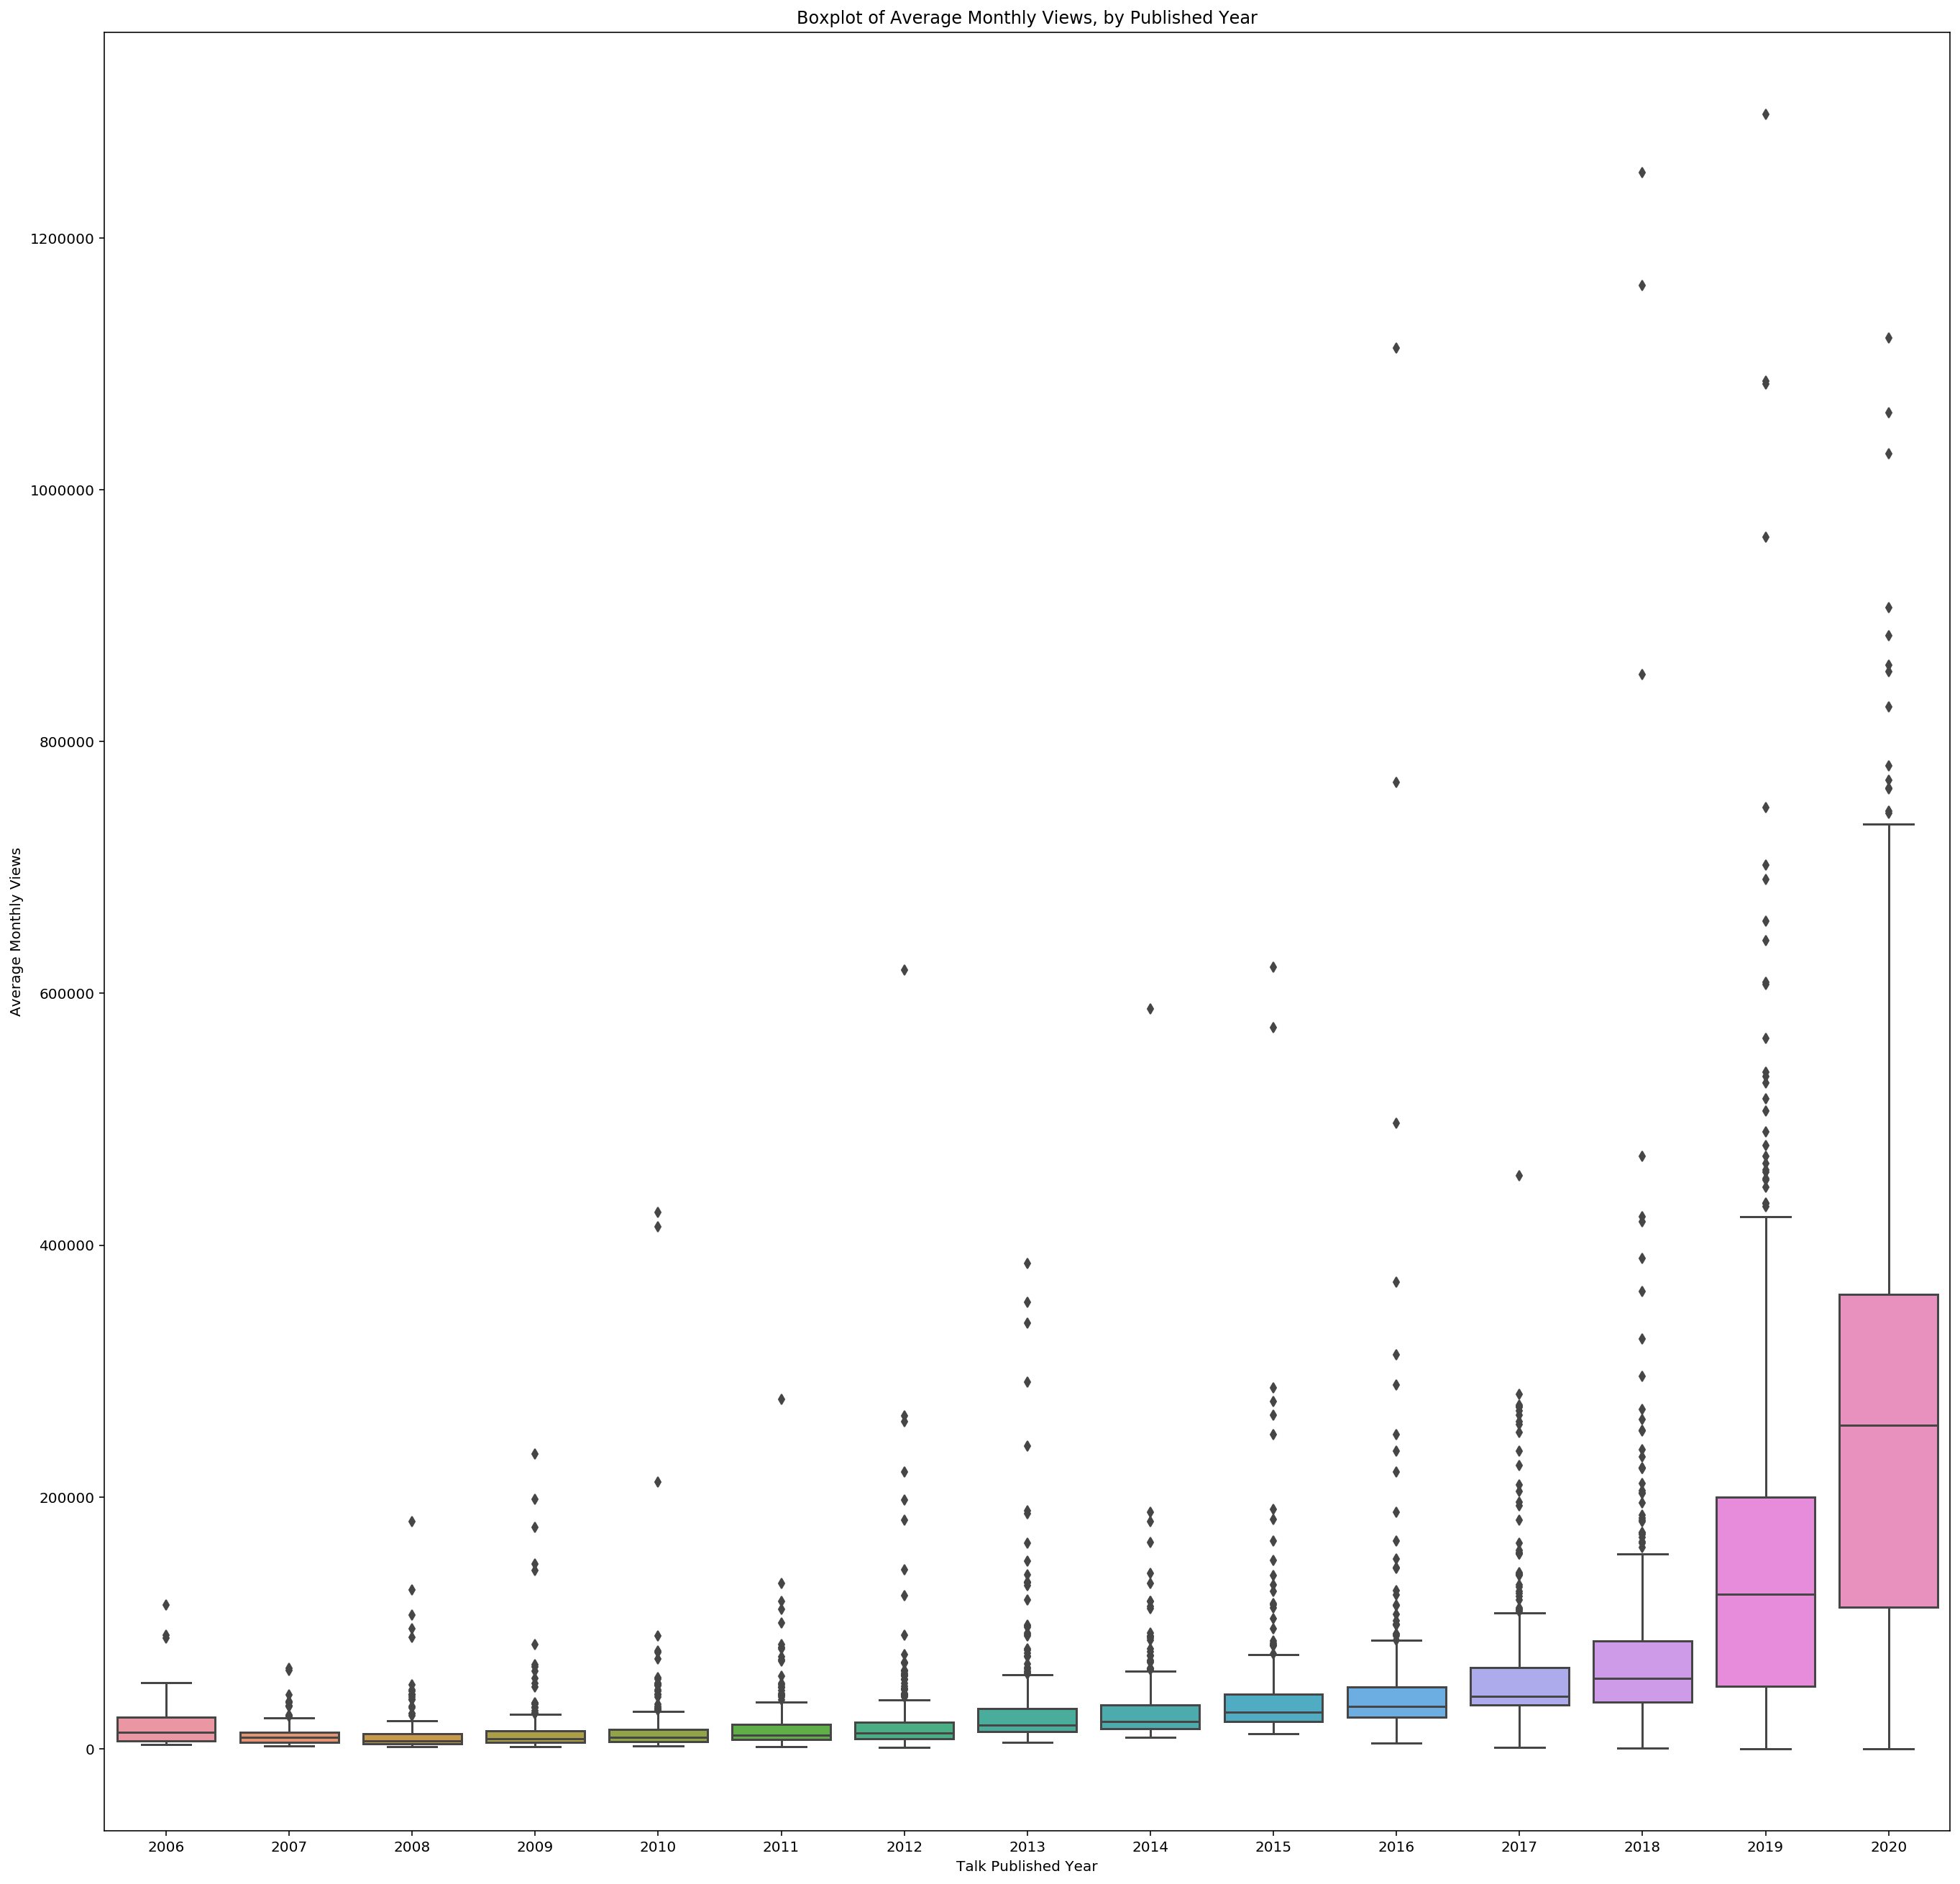

In [27]:
# boxplot of average monthly views, by published year
plt.figure(figsize=(23,23))
sns.boxplot(x="published_year", y="avg_m_views", data=ted_talks)
plt.title("Boxplot of Average Monthly Views, by Published Year")
plt.xlabel("Talk Published Year")
plt.ylabel("Average Monthly Views");

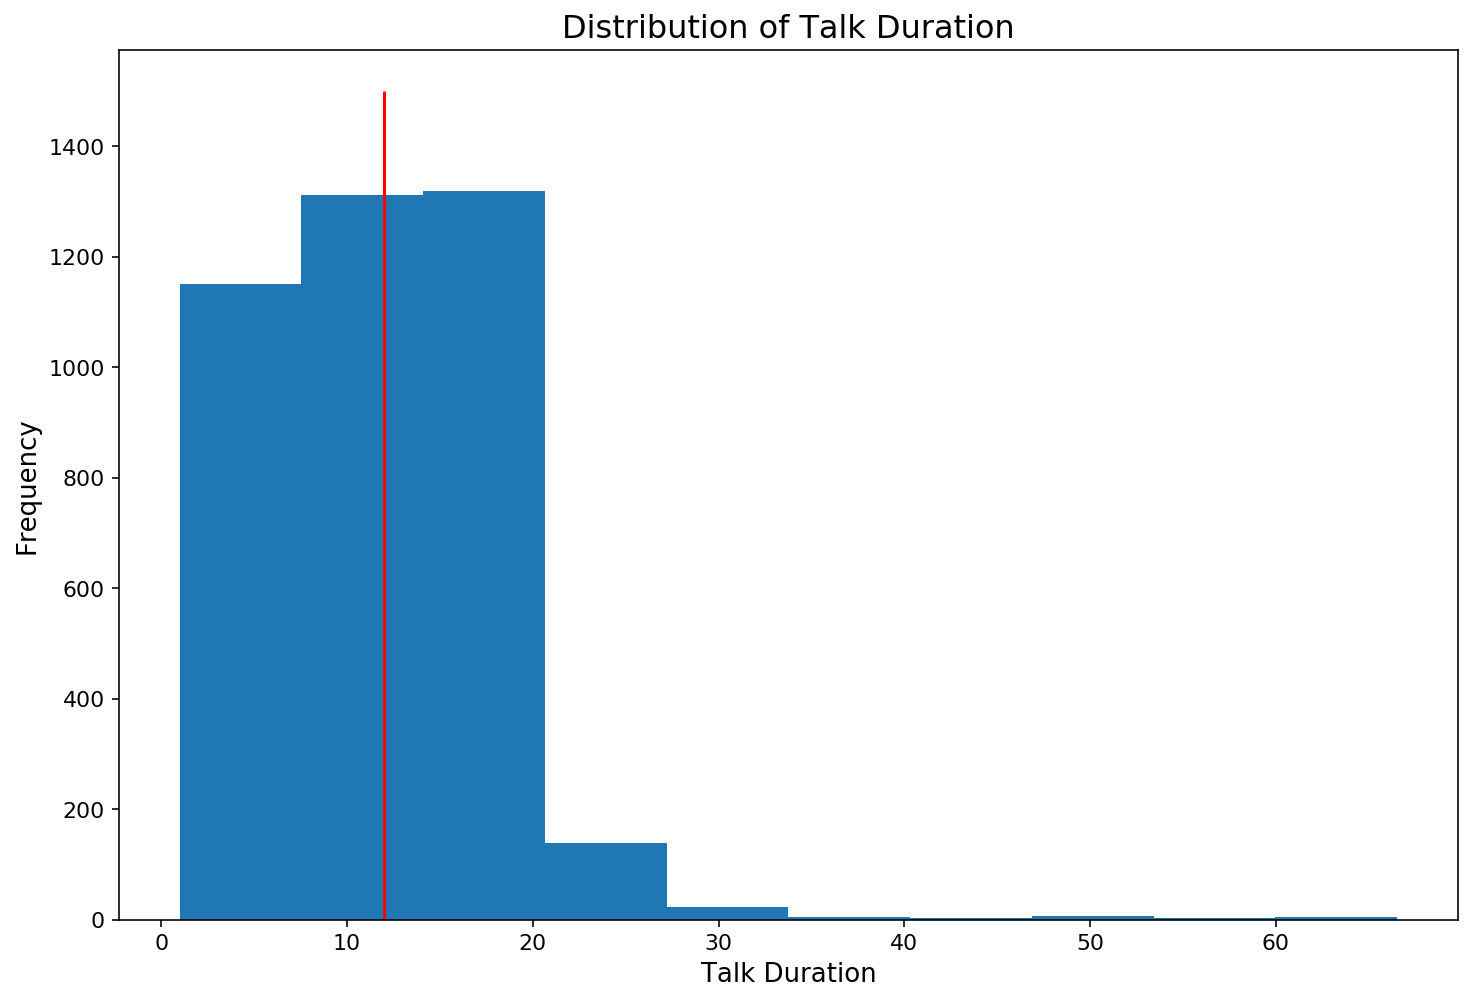

In [32]:
# distribution of talk duration
plt.figure(figsize=(12,8))
plt.hist(ted_talks["duration_min"])
plt.vlines(ted_talks["duration_min"].mean(), 0, 1500, color="r")
plt.title("Distribution of Talk Duration", fontsize=16)
plt.xlabel("Talk Duration", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

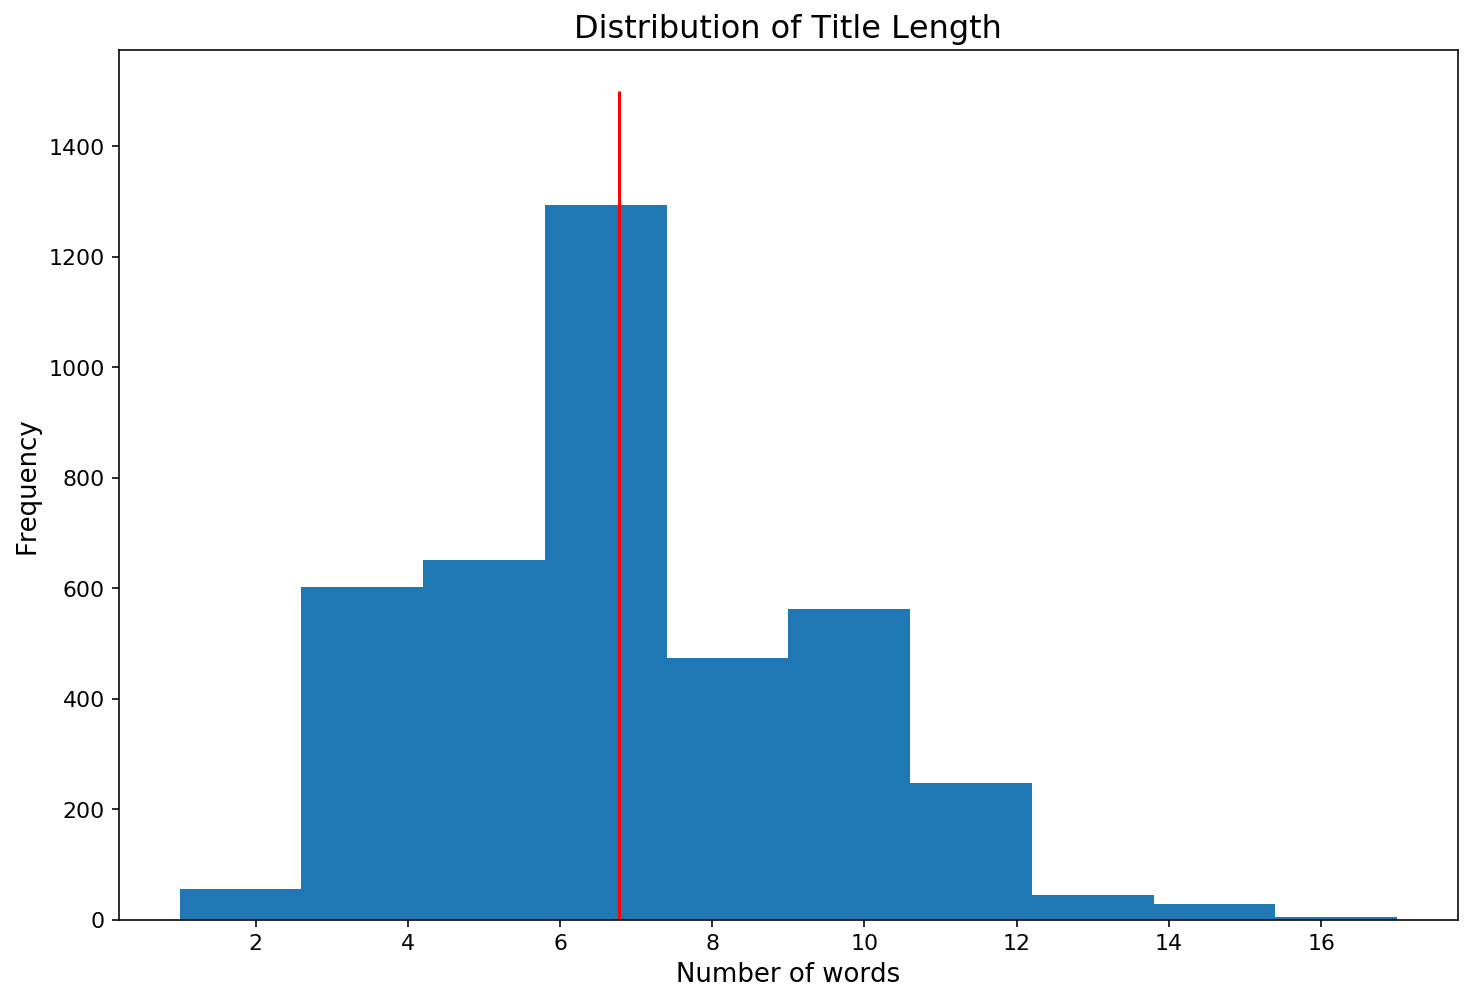

In [34]:
# distribution of title length
plt.figure(figsize=(12,8))
plt.hist(ted_talks["title_len"])
plt.vlines(ted_talks["title_len"].mean(), 0, 1500, color="r")
plt.title("Distribution of Title Length", fontsize=16)
plt.xlabel("Number of words", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

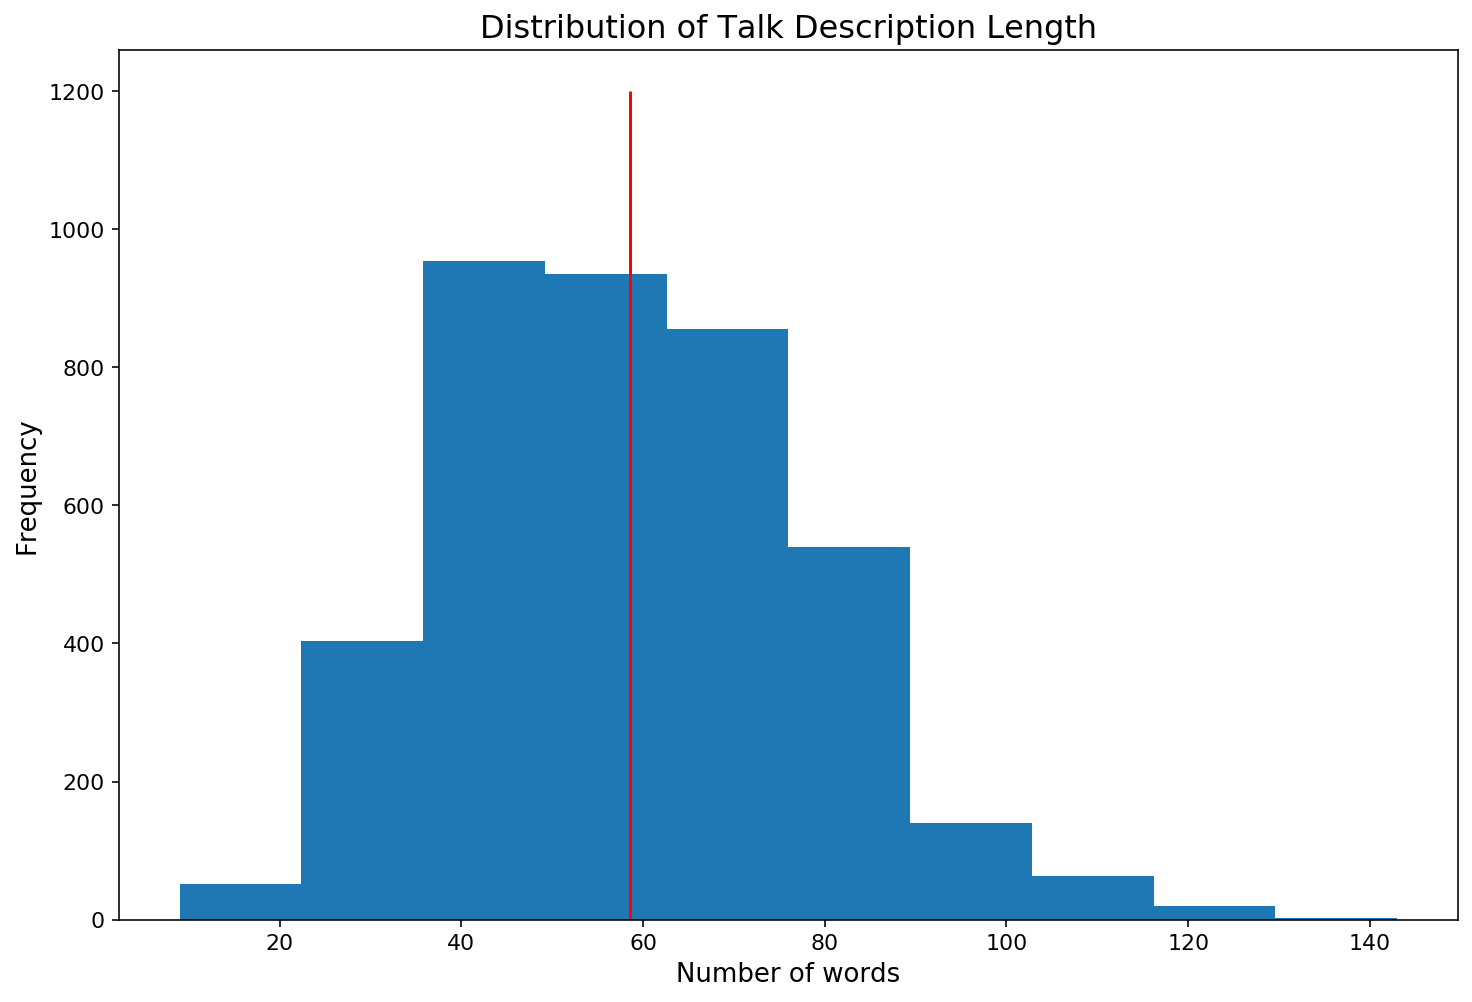

In [36]:
# distribution of talk description length
plt.figure(figsize=(12,8))
plt.hist(ted_talks["description_len"])
plt.vlines(ted_talks["description_len"].mean(), 0, 1200, color="r")
plt.title("Distribution of Talk Description Length", fontsize=16)
plt.xlabel("Number of words", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

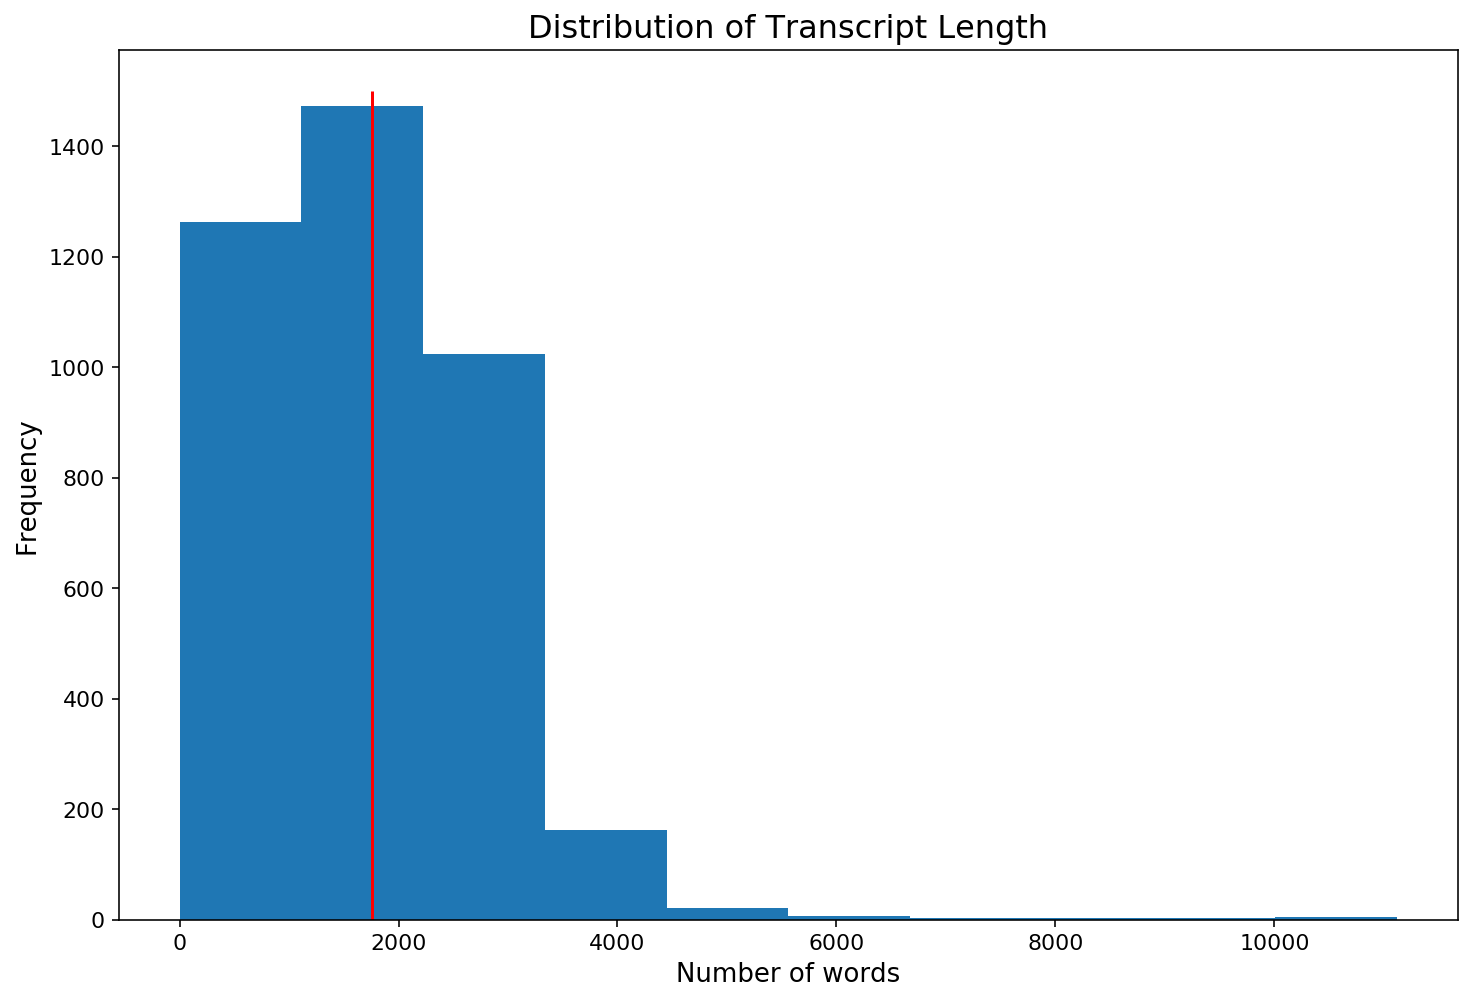

In [41]:
# distribution of transcript length
plt.figure(figsize=(12,8))
plt.hist(ted_talks["transcript_len"])
plt.vlines(ted_talks["transcript_len"].mean(), 0, 1500, color="r")
plt.title("Distribution of Transcript Length", fontsize=16)
plt.xlabel("Number of words", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

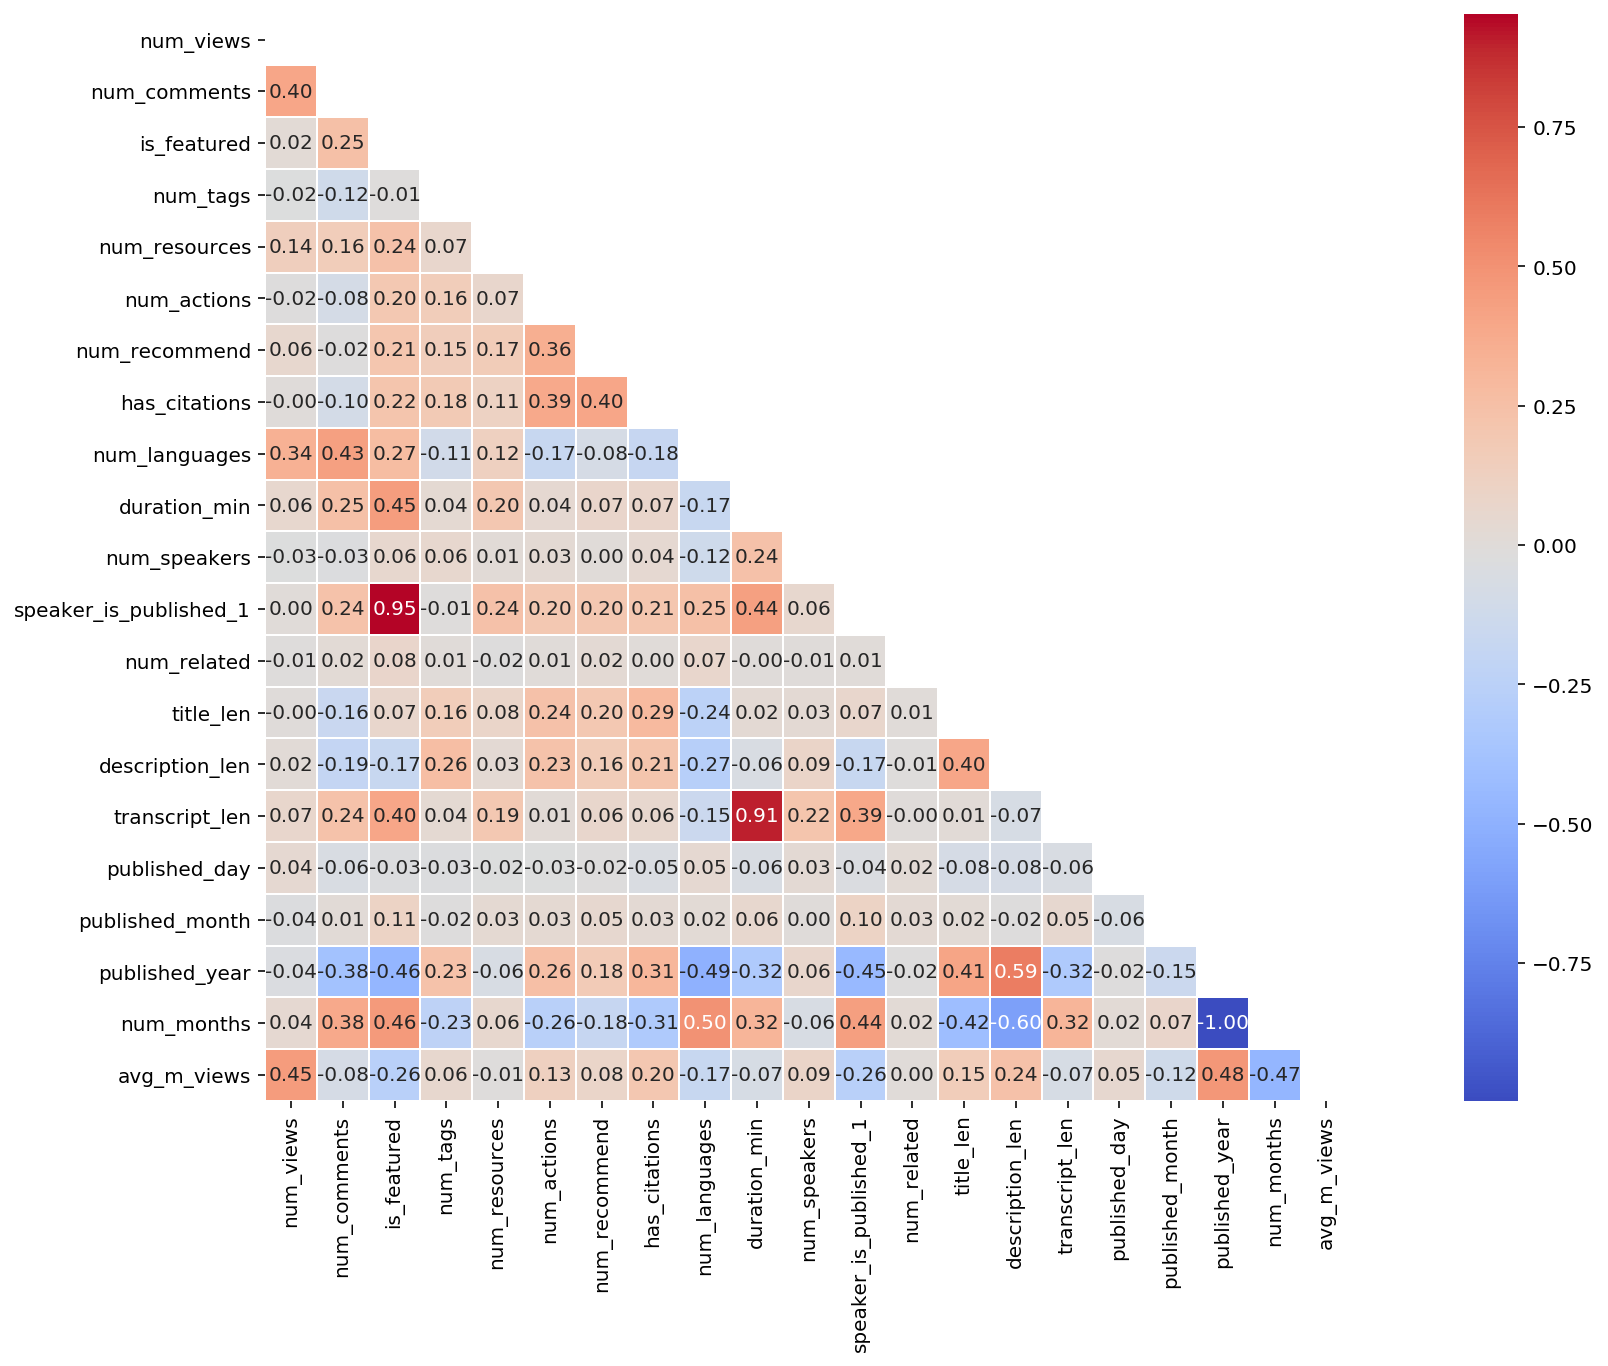

In [48]:
corr = ted_talks[cols_not_id].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f',
            square=True, linewidths=.5);